<a href="https://colab.research.google.com/github/ChrisLouis9913/Chris-Louis/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

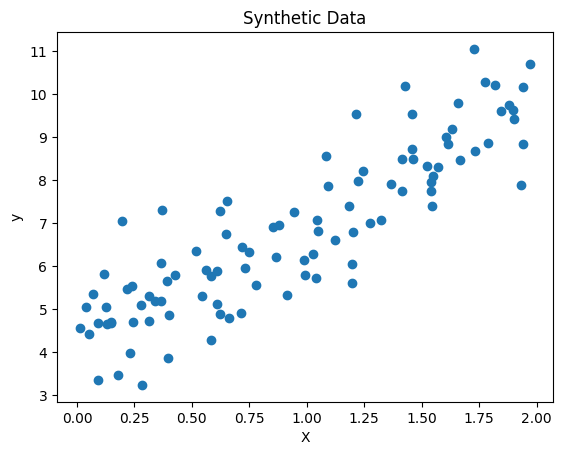

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Do the Linear Regression with Scikit-Learn Library

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAPE:", mape)

R2 Score: 0.8310990846073661
MAPE: 0.08475682819153892


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [11]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)

# Comparison table
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [r2, ridge_r2, lasso_r2],
    "MAPE": [mape, ridge_mape, lasso_mape]
})

print(results)

               Model  R2 Score      MAPE
0  Linear Regression  0.831099  0.084757
1   Ridge Regression  0.825999  0.082412
2   Lasso Regression  0.809082  0.082640


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

## 🧠 Custom Linear Regression Class

In [24]:

class MyLinearRegression:
    def __init__(self):
       self.coef_=None
       self.intercept_=None
       self.loss_history=[]

    def fit(self, X, y, lr=0.01, n_iters=1000):
        n_samples, n_features=X.shape
        self.coef_=np.zeros((n_features,1))
        self.intercept_=0

        for _ in range(n_iters):
          y_pred=self.predict(X)
          loss=(1/n_samples)*np.sum((y-y_pred)**2)
          self.loss_history.append(loss)

          d_coef=-(2/n_samples)*np.dot(X.T,(y-y_pred))
          d_intercept=-(2/n_samples)*np.sum(y-y_pred)

          self.coef_-=lr*d_coef
          self.intercept_-=lr*d_intercept

    def predict(self, X):
        return np.dot(X,self.coef_) + self.intercept_

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X,y,lr,n_iters)
        return self.predict(X)


## 🔁 Train the Model and Visualize the Fit

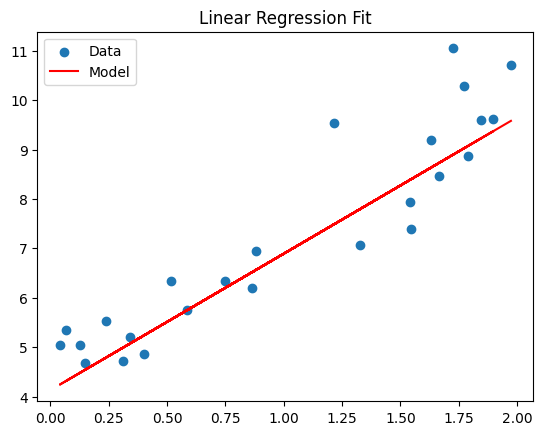

Learned coefficients (m, c): [[2.76028721]]


In [25]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)


## 📉 Plot the Loss Curve

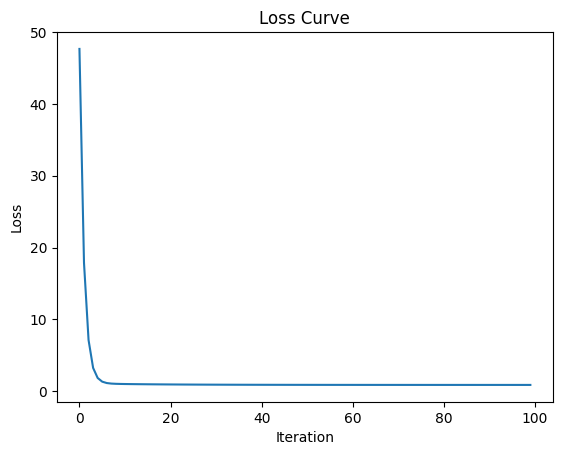

In [27]:
plt.plot(model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [28]:
class MyLinearRegressionSGD:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.loss_history = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros((n_features, 1))
        self.intercept_ = 0

        for _ in range(n_iters):
            for i in range(n_samples):
                # Select a random sample
                rand_index = np.random.randint(n_samples)
                X_i = X[rand_index:rand_index+1]
                y_i = y[rand_index:rand_index+1]

                y_pred = self.predict(X_i)
                loss = (1/n_samples) * np.sum((y - self.predict(X))**2) # Loss on whole dataset
                self.loss_history.append(loss)

                d_coef = -(2) * X_i.T * (y_i - y_pred)
                d_intercept = -(2) * np.sum(y_i - y_pred)

                self.coef_ -= lr * d_coef
                self.intercept_ -= lr * d_intercept

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)

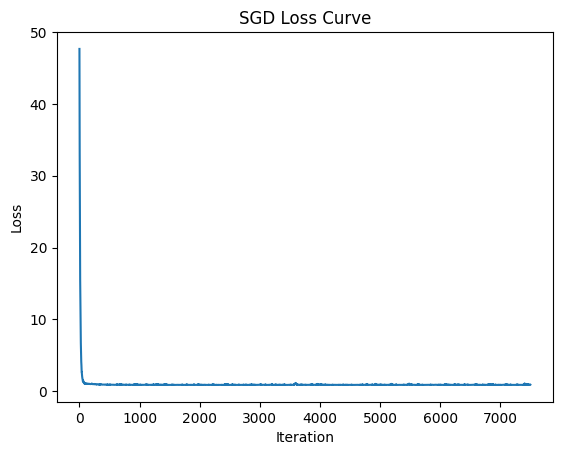

In [29]:
sgd_model = MyLinearRegressionSGD()
sgd_model.fit(X_train, y_train, lr=0.01, n_iters=100)

plt.plot(sgd_model.loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("SGD Loss Curve")
plt.show()

## Visualize the prediction result of Library version and Custom regression code created

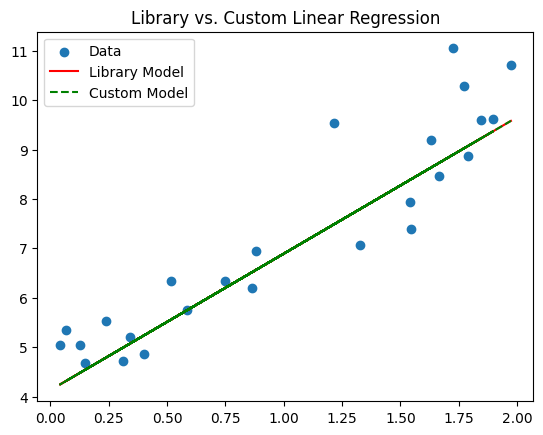

In [31]:
custom_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Library Model")
plt.plot(X_test, custom_pred, color="green", label="Custom Model", linestyle='--')
plt.legend()
plt.title("Library vs. Custom Linear Regression")
plt.show()

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version